# Optimal policies per seed

In this notebook, we load the results from optimal policies with their corresponding reference scenario and plot the KPI pathways.

In [1]:
from dmdu.general.visualization import plot_simple_kpi_pathways_with_seeds
import os
import pandas as pd
from ema_workbench import load_results

## Loading the file names

In [2]:
target_directory = os.path.join(
    os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))),
    'data',
    'experiments'
)
files = sorted(os.listdir(target_directory))
files

['SUFFICIENTARIAN_AGGREGATED_seed_0_reference_0',
 'SUFFICIENTARIAN_AGGREGATED_seed_0_reference_1',
 'SUFFICIENTARIAN_AGGREGATED_seed_0_reference_2',
 'SUFFICIENTARIAN_AGGREGATED_seed_0_reference_3',
 'SUFFICIENTARIAN_AGGREGATED_seed_1_reference_0',
 'SUFFICIENTARIAN_AGGREGATED_seed_1_reference_1',
 'SUFFICIENTARIAN_AGGREGATED_seed_1_reference_2',
 'SUFFICIENTARIAN_AGGREGATED_seed_1_reference_3',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_0_reference_0',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_0_reference_1',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_0_reference_2',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_0_reference_3',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_1_reference_0',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_1_reference_1',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_1_reference_2',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_1_reference_3',
 'UTILITARIAN_AGGREGATED_seed_0_reference_0',
 'UTILITARIAN_AGGREGATED_seed_0_reference_1',
 'UTILITARIAN_AGGREGATED_seed_0_reference_2',
 'UTILITARIAN_AGGREGATED_seed_0_refere

## Loading results

In [3]:
seeds_dict = {}
previous_problem_formulation = ''
problem_formulations = {}

for idx, file in enumerate(files):

    # print(f'previous_problem_formulation: {previous_problem_formulation}')

    # Define path to load data from
    path = os.path.join(target_directory, file)

    # Splitting terms
    terms = file.split('_')
    problem_formulation = terms[0] + '_' + terms[1]
    # print(f'problem_formulation: {problem_formulation}\n')
    seed_idx = terms[3]
    reference_idx = terms[-1]

    # Load results
    _, outcomes = load_results(path)
    outcomes = pd.DataFrame(outcomes)

    if previous_problem_formulation != problem_formulation:
        seeds_dict = {seed_idx: outcomes}
        previous_problem_formulation = problem_formulation
    else:
        seeds_dict[seed_idx] = pd.concat([seeds_dict[seed_idx], outcomes]) if seed_idx in seeds_dict else outcomes

    # Save data
    # seeds_dict[seed_idx] = pd.concat([seeds_dict[seed_idx], outcomes]) if seed_idx in seeds_dict else outcomes
    problem_formulations[problem_formulation] = seeds_dict


## Visualization of KPI pathways, grouped by seeds

In [4]:
for problem_formulation, seeds_dict in problem_formulations.items():
    len0 = len(seeds_dict['0'])
    len1 = len(seeds_dict['1'])
    print(f'{problem_formulation}\n{len0}, {len1}\n')

SUFFICIENTARIAN_AGGREGATED
901, 925

SUFFICIENTARIAN_DISAGGREGATED
4868, 4831

UTILITARIAN_AGGREGATED
14, 14

UTILITARIAN_DISAGGREGATED
4650, 4646



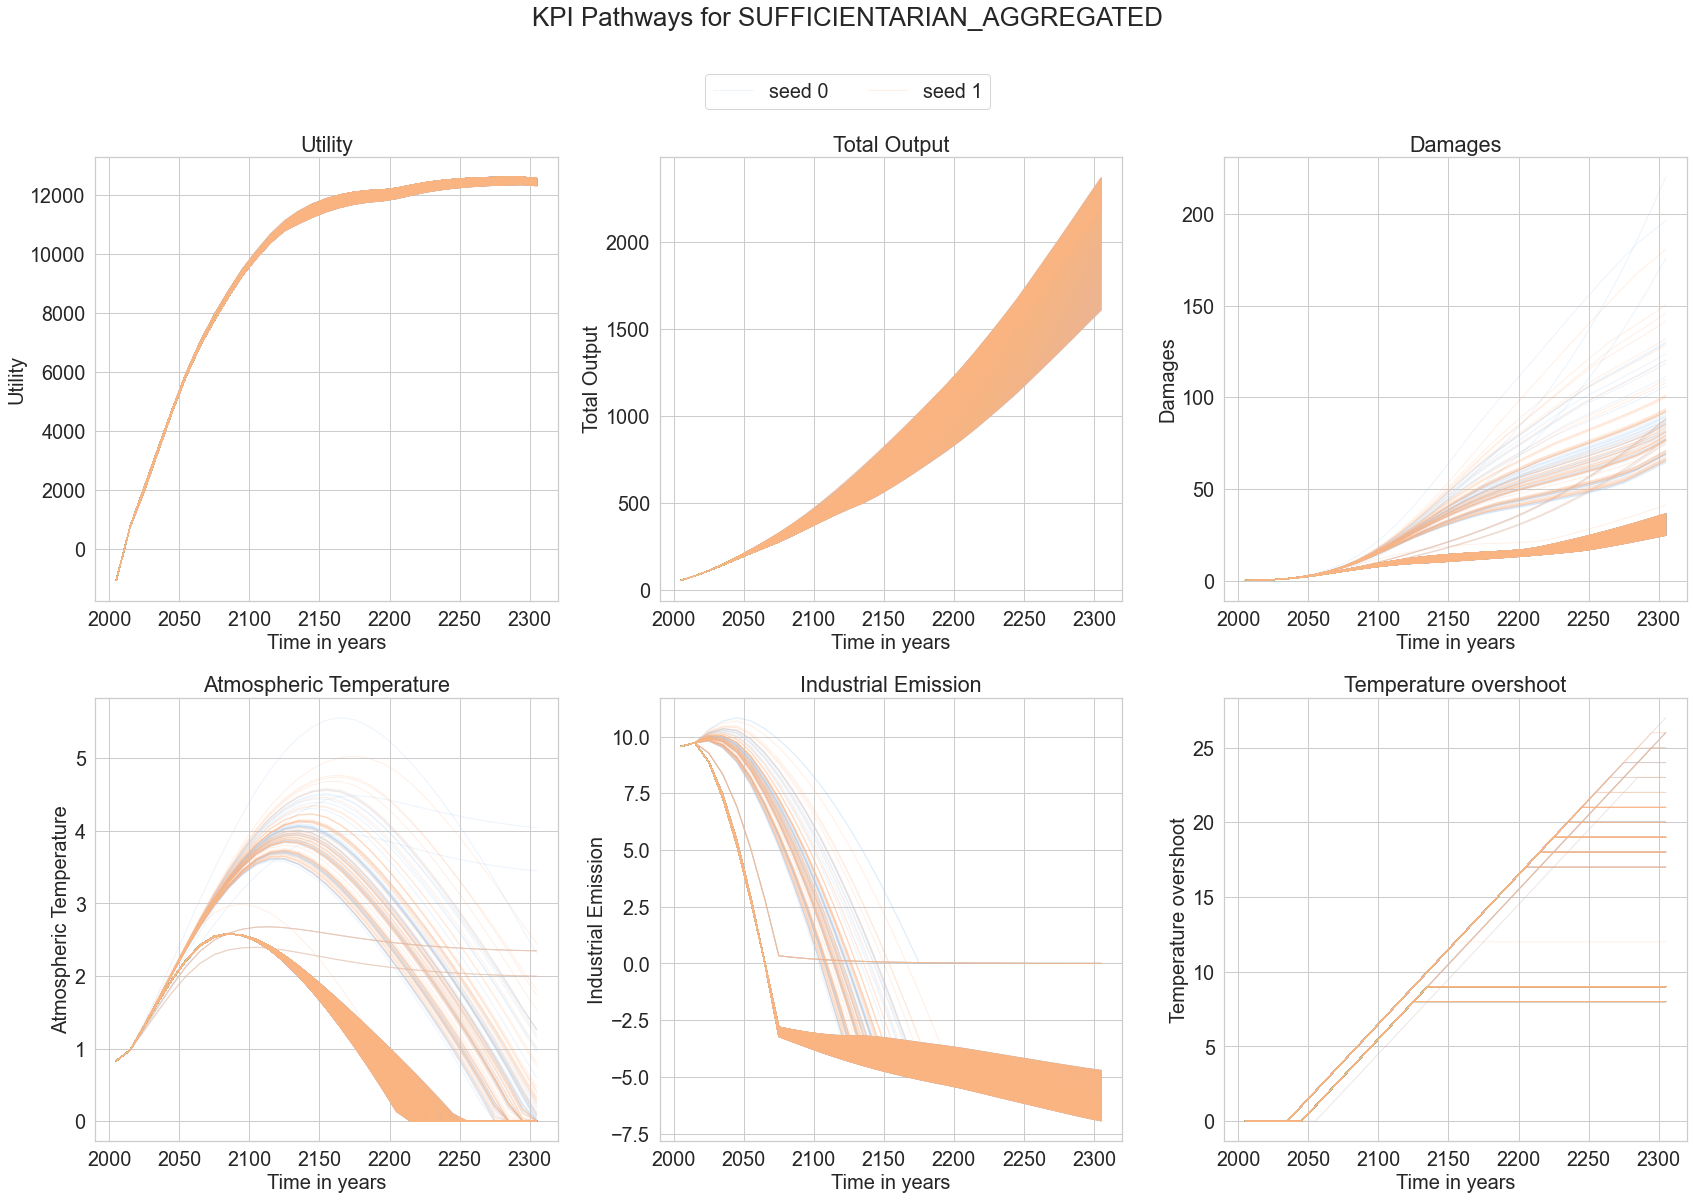

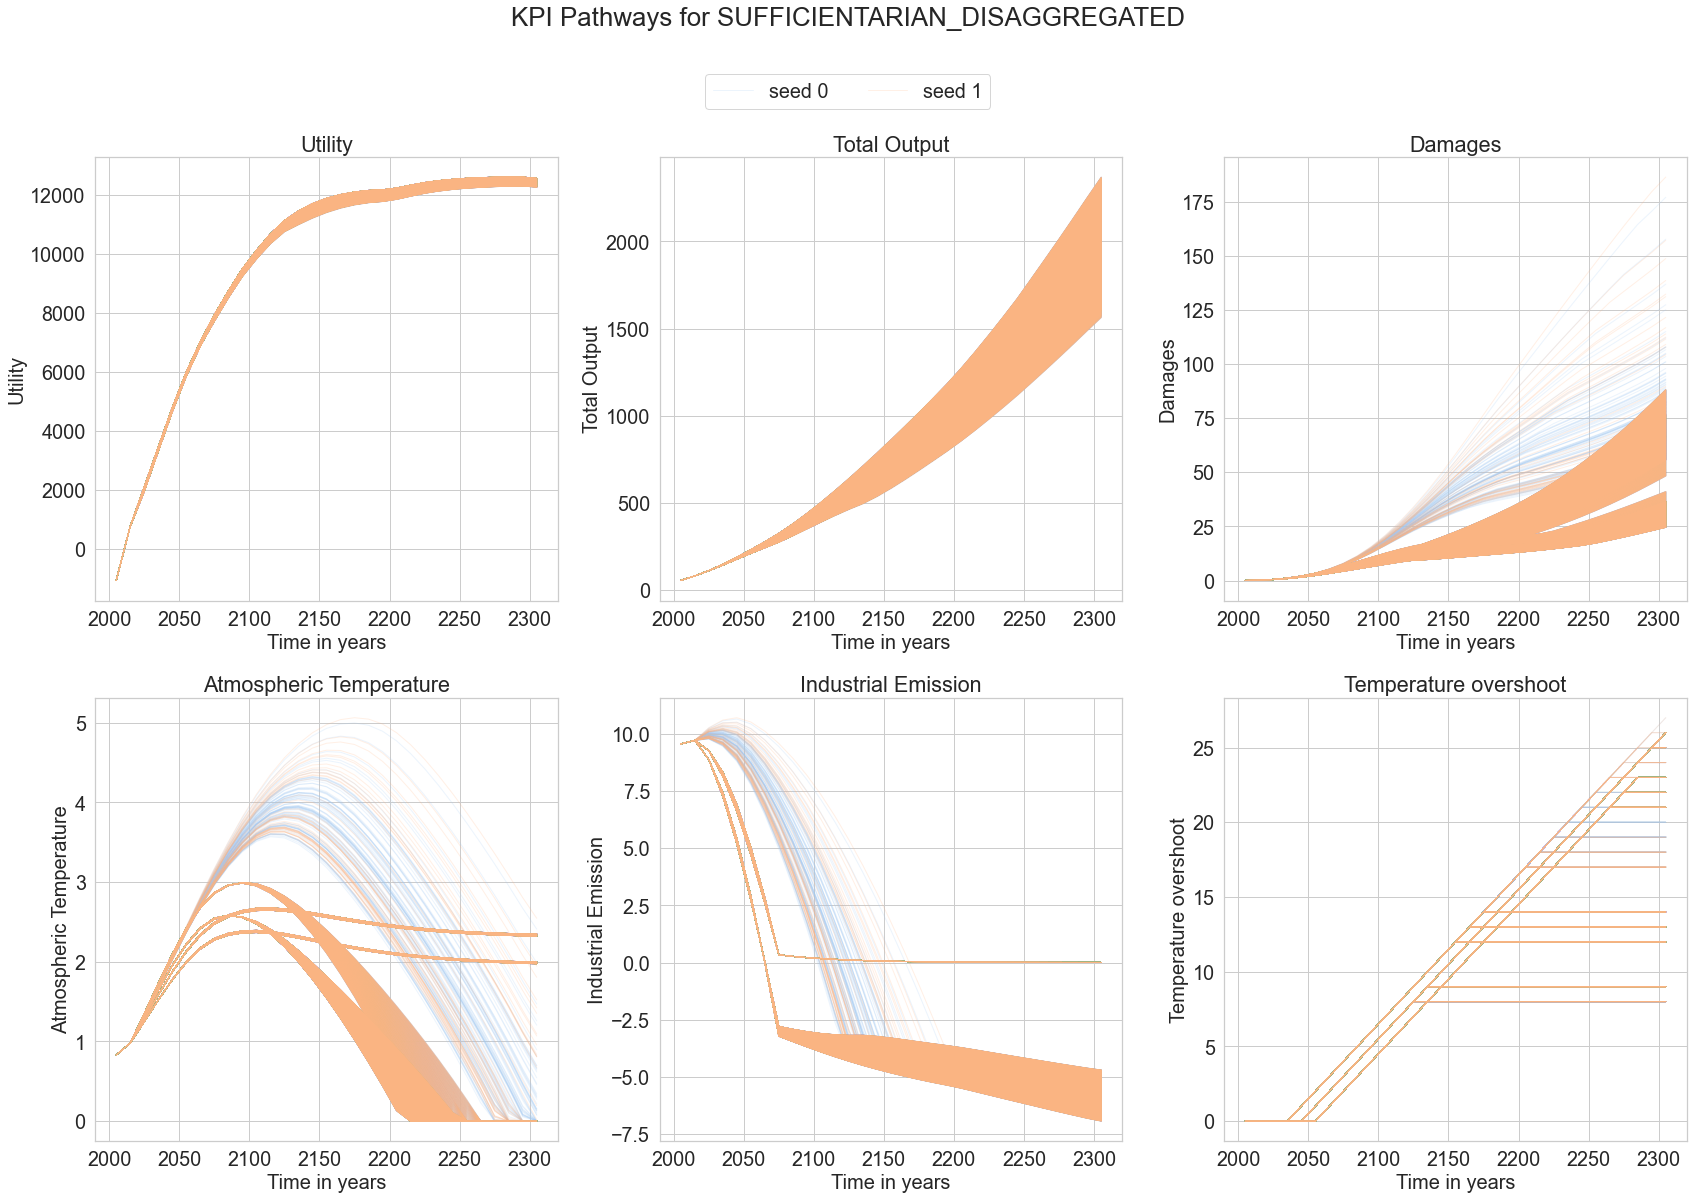

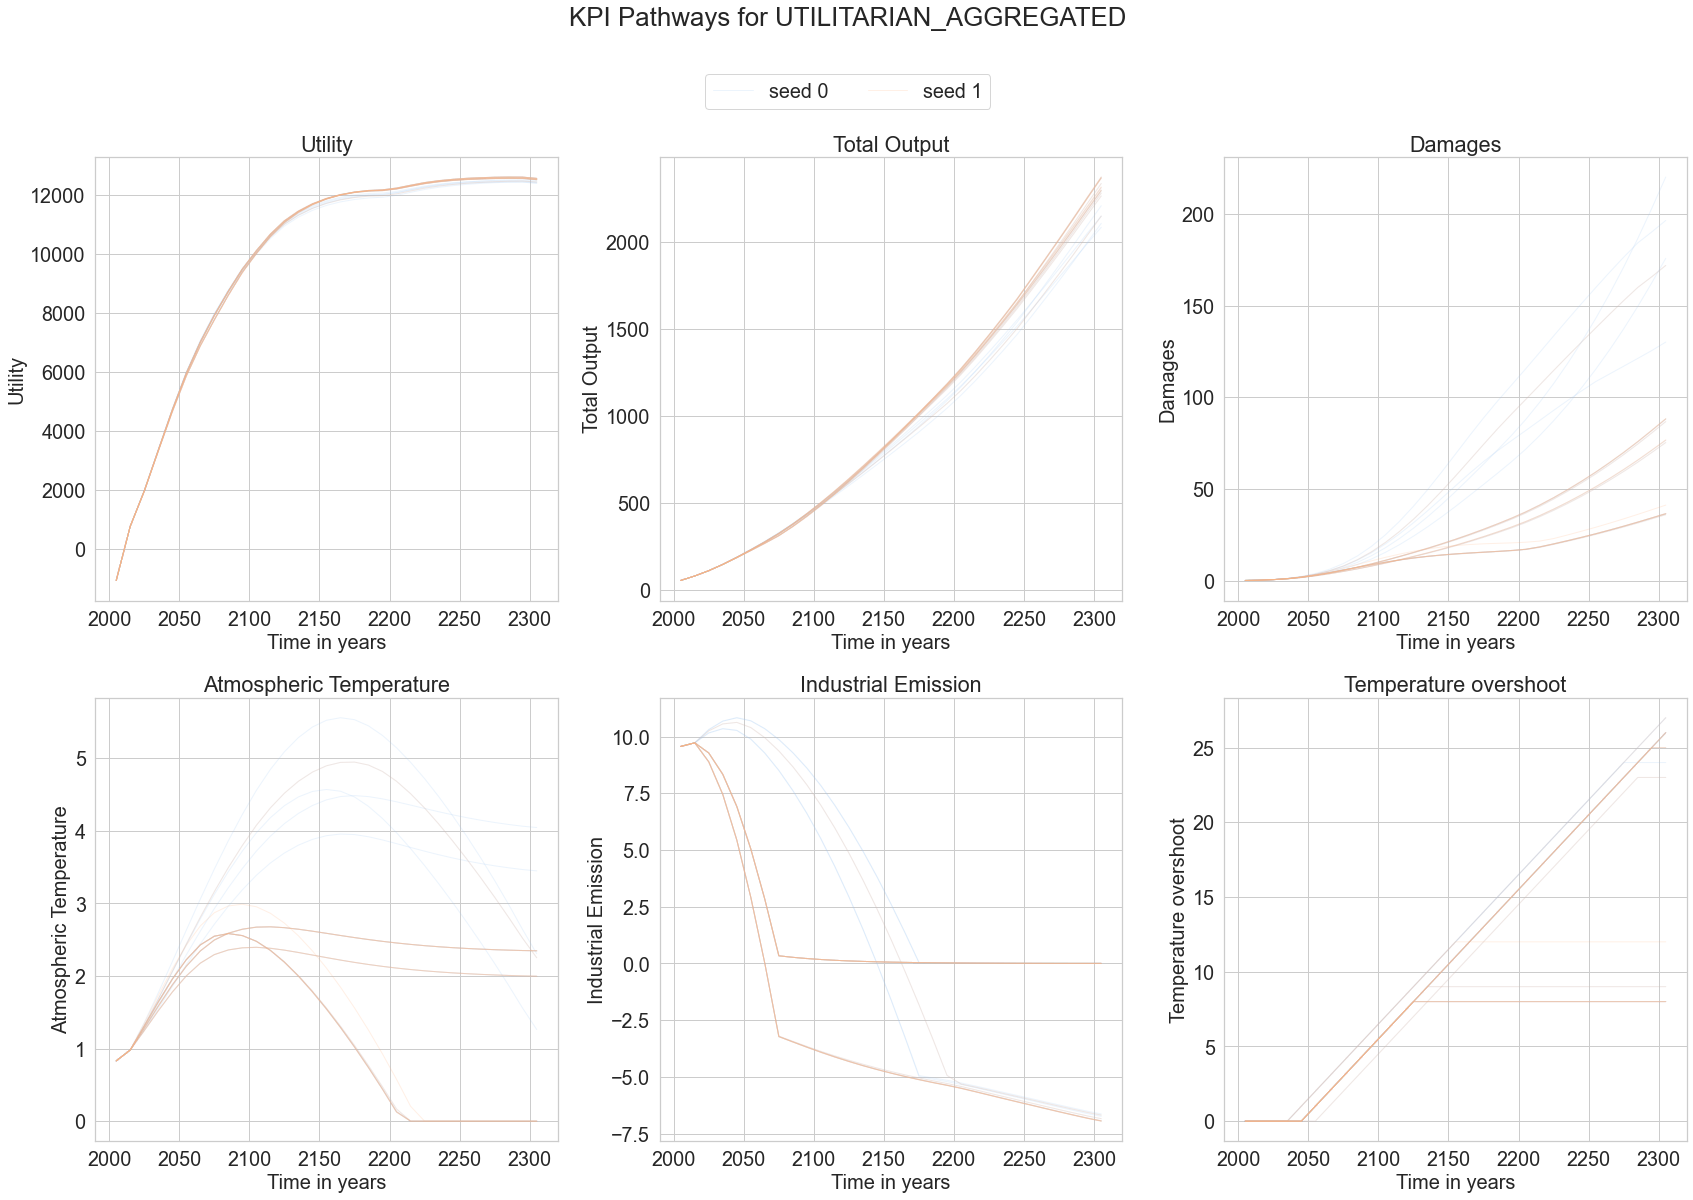

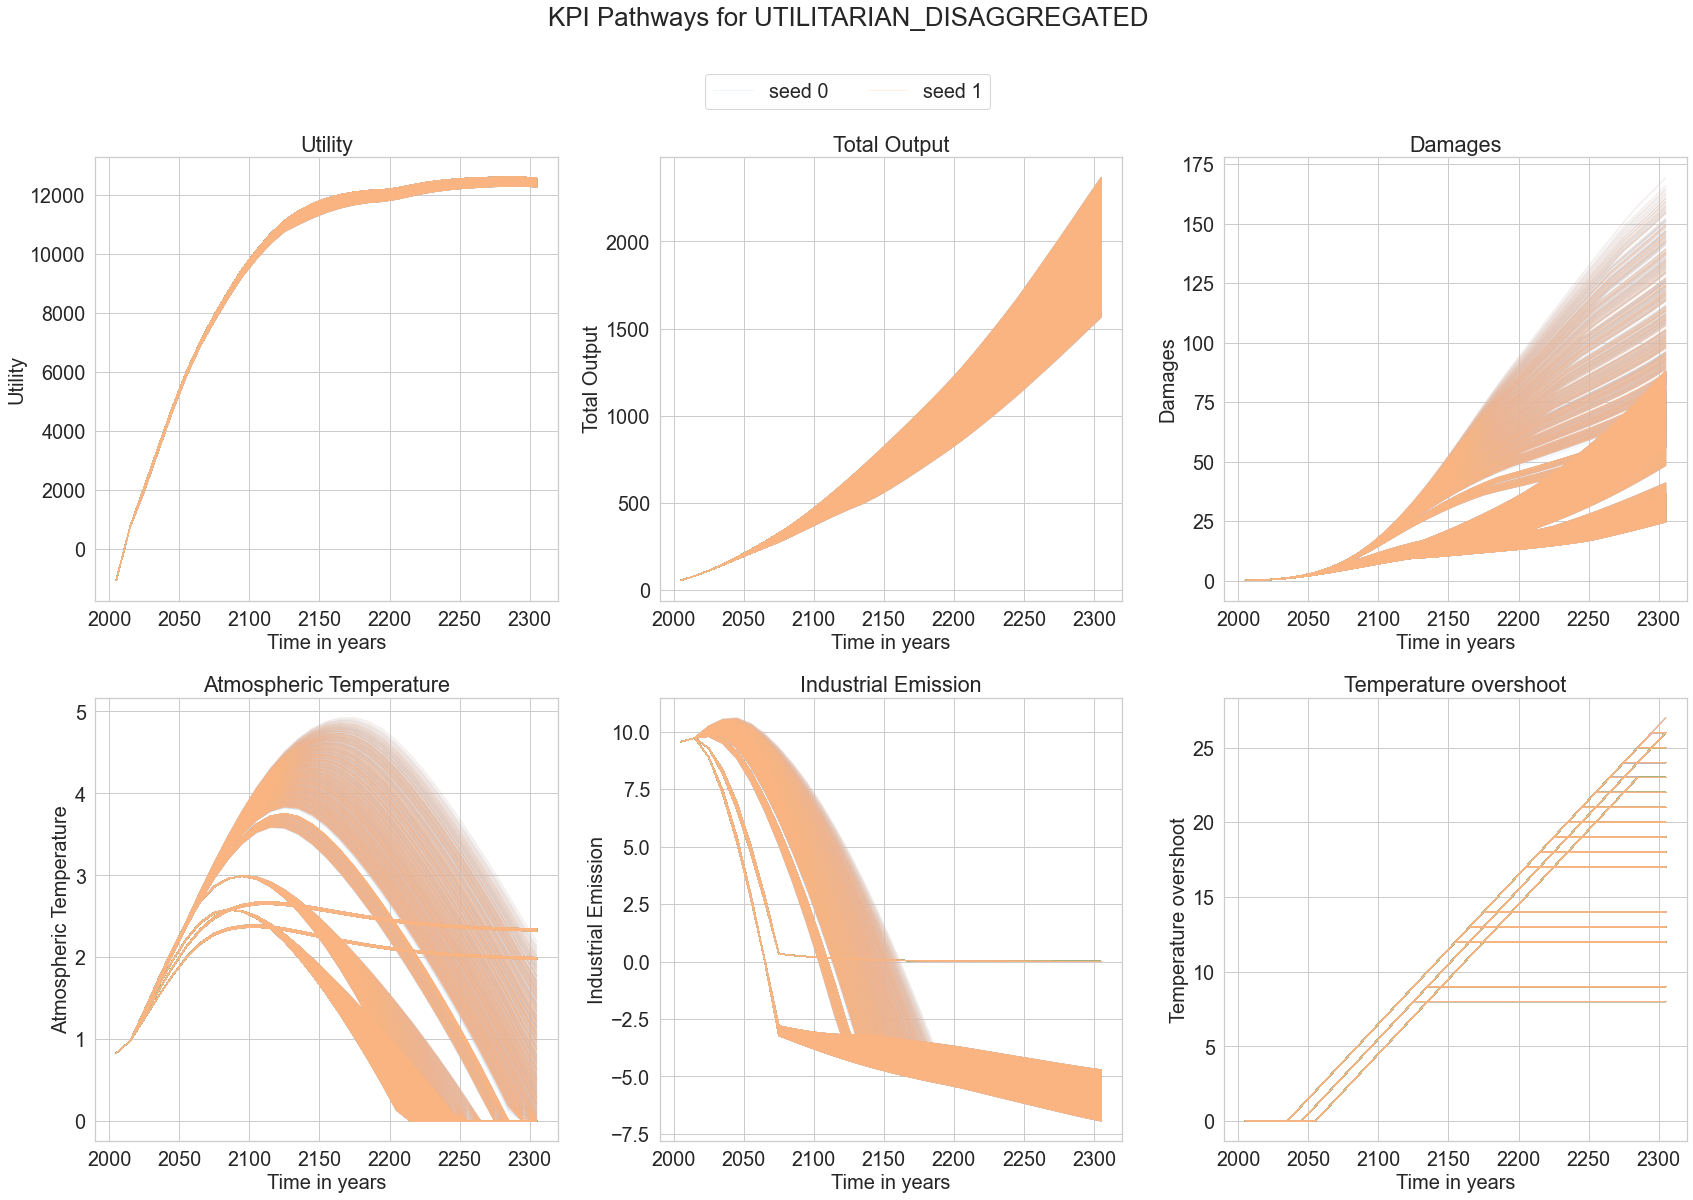

In [5]:
for problem_formulation, seeds_dict in problem_formulations.items():
    plot_simple_kpi_pathways_with_seeds(
        seeds_dict=seeds_dict,
        problem_formulation=problem_formulation,
        saving=False,
        file_name=f'seed_analysis_{problem_formulation}'
    )